# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading Dataset

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# 3. Data Cleaning

### Taks 1. Missing Values

In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in the dataset.

### Task 2. Duplicate Values

In [5]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


There are a lot of duplicate values in the dataset. We can remove them using `drop_duplicates()` method.

In [6]:
data = data.drop_duplicates()

In [7]:
data.duplicated().any()

False

### Task 3. Checking for any inconsistencies in data summary

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The data looks fine and is ready for analysis and visulization.

# 4. Exploratory Data Analysis

#### >> How many people have and don't have heart disease?

In [9]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

[Text(0, 0, '138'), Text(0, 0, '164')]

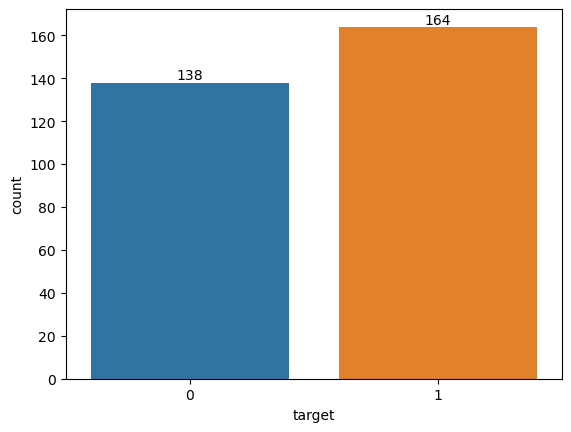

In [23]:
ax = sns.countplot(x=data['target'])
ax.bar_label(ax.containers[0])

#### >> Which Gender Has The Most Heart Disease?

In [24]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

([<matplotlib.axis.XTick at 0x20c6d0089d0>,
 [Text(1, 0, 'Male'), Text(0, 0, 'Female')])

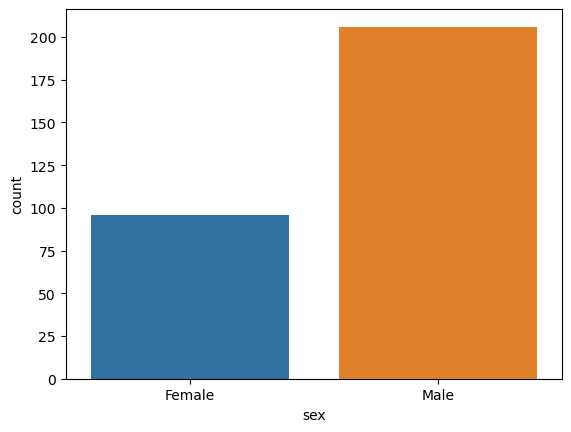

In [31]:
sns.countplot(x=data['sex'])
plt.xticks([1,0],['Male','Female'])

#### >> Find Gender Distribution According to The Target Variable.

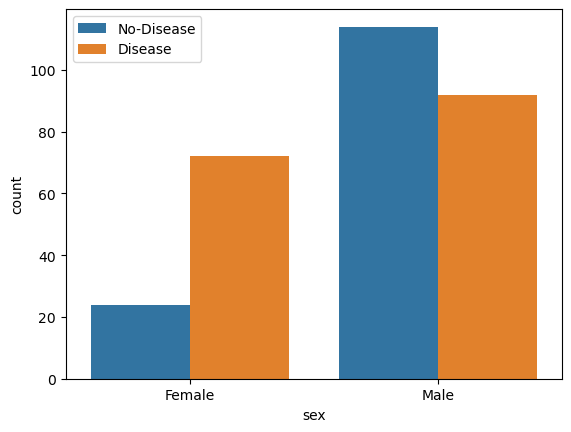

In [13]:
sns.countplot(x='sex',hue='target',data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()


#### >> Check Age Distribution In The Dataset

In [35]:
round(data['age'].mean(),0)

54.0

C:\Users\hrith\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

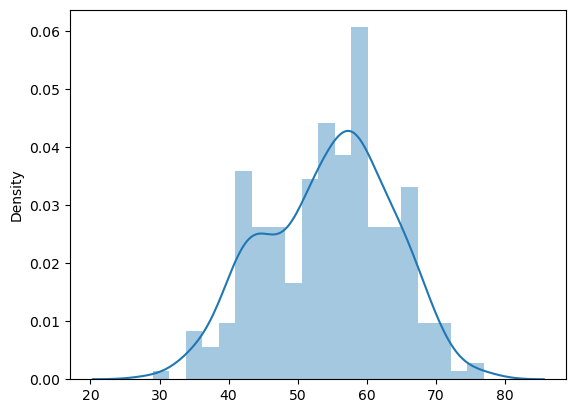

In [32]:
sns.distplot(x=data['age'],bins=20)

#### >> Check Chest Pain Type

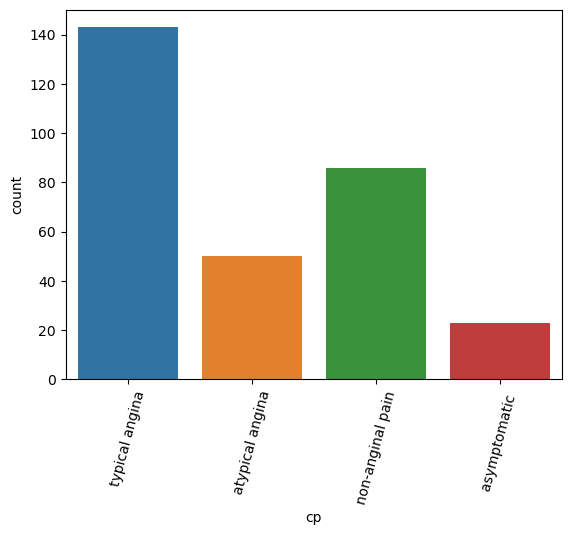

In [33]:
sns.countplot(x=data['cp'])
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic "])
plt.xticks(rotation=75)
plt.show()

#### >> Show The Chest Pain Distribution As Per Target Variable

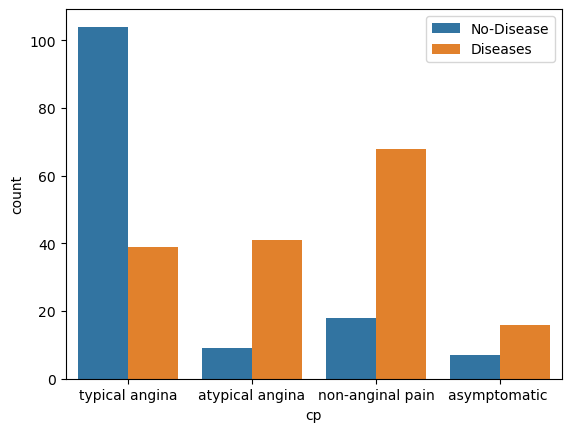

In [36]:
sns.countplot(x='cp',hue='target',data=data)
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic "])
plt.legend(labels=['No-Disease','Diseases'])
plt.show()


#### >> Show Fasting Blood Sugar Distribution According To Target Variable

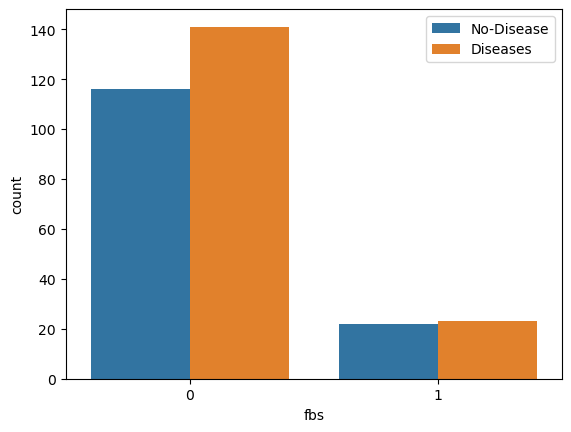

In [17]:
sns.countplot(x='fbs',hue='target',data=data)
plt.legend(labels=['No-Disease','Diseases'])
plt.show()

#### >> Compare Resting Blood Pressure As Per Sex Column

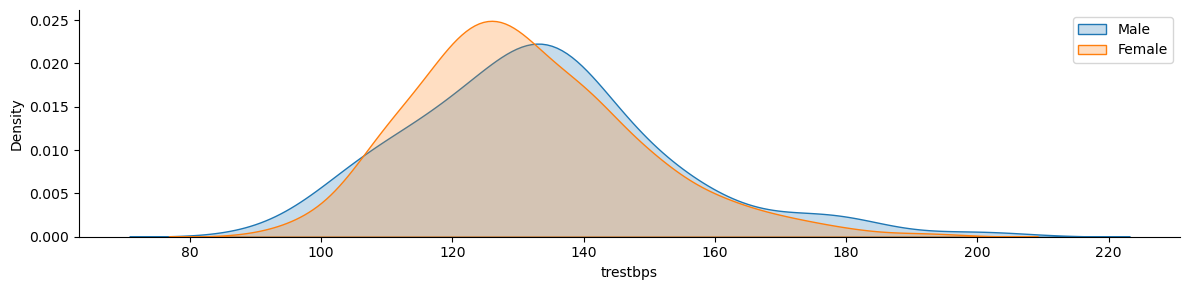

In [18]:
g = sns.FacetGrid(data,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])

#### >> Plotting Continuous Variables

In [37]:
cate_val = []
cont_val = []
for column in data.columns:
    if len(data[column].unique())<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [38]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

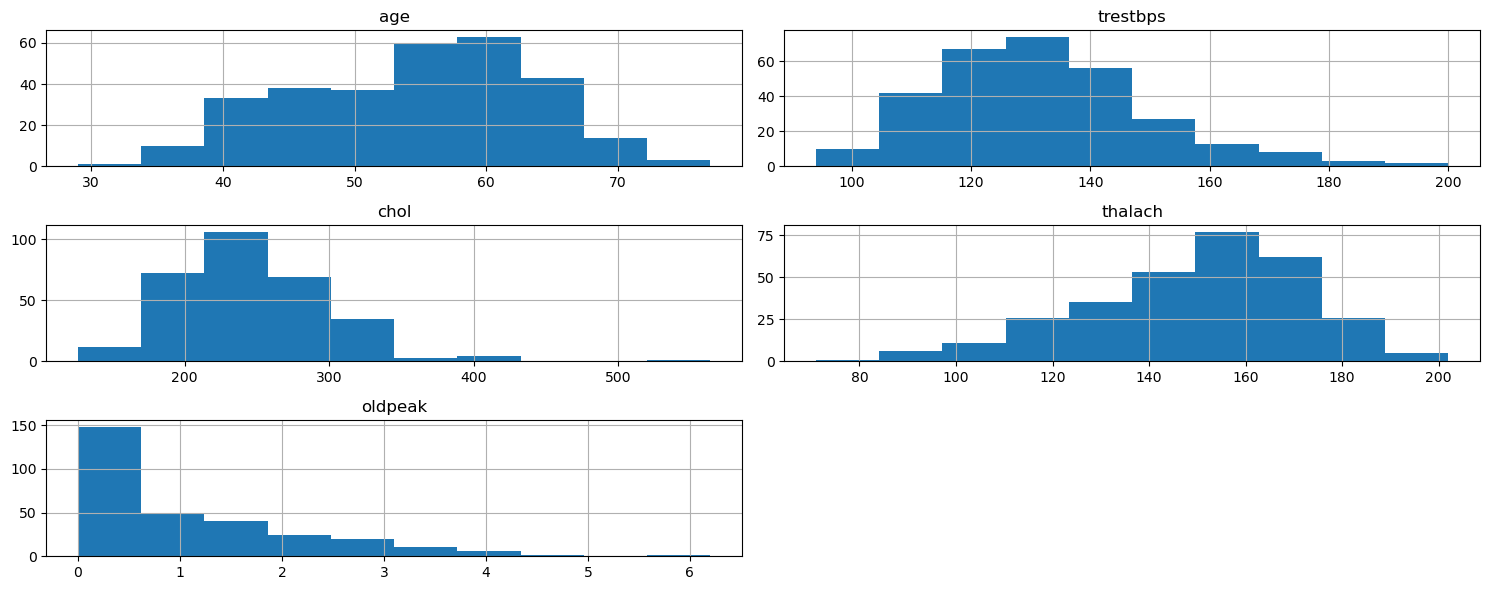

In [39]:
data.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()


#### >> Showing Correlation between columns

<AxesSubplot:>

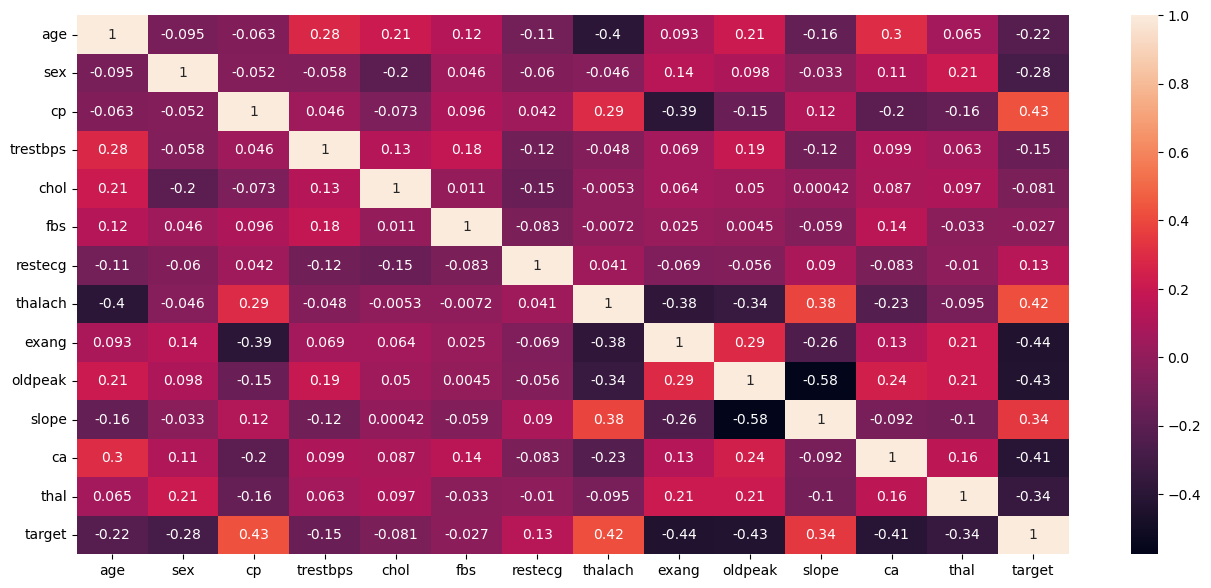

In [40]:
plt.figure(figsize=(16,7))
sns.heatmap(data.corr(),annot=True)

# 5. Conclusions

From the above EDA we gain the following insights:
    
1. More than **50%** of people in the dataset suffer from heart disease.
2. In comparison, **Males** are more more prone to heart diseases.
3. Mean age of patients ia **54 years**.
4. A great number of patients suffer from **Typical angina chest pain**.
5. Patients suffering from **Non-anginal chest pain** are the most prominent patients for heart diseases.
6. **Chest Pain**, **thalach** and **slope of peak exercise ST segment** are highly correlated with heart diseases.